# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [6]:
#%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

ImportError: cannot import name 'rcParams'

In [9]:
import matplotlib.pyplot as plt

ImportError: cannot import name 'rcParams'

# 1.1 Read the data

In [2]:
project_data = pd.read_csv("train_data.csv").head(50000)
resource_data = pd.read_csv("resources.csv")

### will take the count and percentage of the project approval data

In [3]:
project_approval_count = project_data['project_is_approved'].value_counts()
print("The Number of project that are approved for funding",project_approval_count[1])
print("The approval percentage rate :",(project_approval_count[1]/(project_approval_count[1]+project_approval_count[0]))*100,"%")
print("The Number of project that are rejected for funding",project_approval_count[0])
print("The rejected percentage rate :",(project_approval_count[0]/(project_approval_count[1]+project_approval_count[0]))*100,"%")

The Number of project that are approved for funding 42286
The approval percentage rate : 84.572 %
The Number of project that are rejected for funding 7714
The rejected percentage rate : 15.428 %


### The number data points in `train_data.csv` and `resources_data.csv`

In [4]:
print("The number of data points in train_data",project_data.shape)
print("="*70)
print("The number of data points in resource_data",resource_data.shape)

The number of data points in train_data (50000, 17)
The number of data points in resource_data (1541272, 4)


### Data Columns/Features present in `train_data.csv`

In [5]:
print("The Features names are as follows \n",project_data.columns.values)

The Features names are as follows 
 ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


### resource data 

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 preprocessing of `project_subject_catergories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
#print(catogories)
cat_list = []
for i in catogories:
    temp = ""
    for j in i.split(','):
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp += j.strip()+""
        temp = temp.replace('&','_')
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'],axis=1,inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(),key=lambda kv:kv[1]))
        

# 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_categories = list(project_data['project_subject_subcategories'].values)
sub_cat = []
for i in sub_categories:
    temp = ""
    for j in i.split(','):
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp+=j.strip()+""
        temp = temp.replace('&','_')
    sub_cat.append(temp.strip())

project_data['clean_sub_categories'] = sub_cat
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_sub_categories'].values:
    my_counter.update(word.split())

sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict =dict(sorted(sub_cat_dict.items(),key=lambda kv:kv[1])) 

<h2><font color='red'>preprocessing of project grade categories</font></h2>

In [9]:
clean_project_grade_cat = []
for i in project_data["project_grade_category"]:
    cat = re.sub(r" ", "_", i)
    cat = re.sub(r"-","_", cat)
    clean_project_grade_cat.append(cat.lower())
    
project_data["project_grade_category"] = clean_project_grade_cat  

### taking care of Nan values present in teacher prefix dataset of project data

In [10]:
print (project_data["teacher_prefix"].value_counts())

def removeNan(val):
    if val != val:
        return 'Mrs'
    return val
        

clean_teacher_prefix = project_data["teacher_prefix"].map(removeNan)
project_data["teacher_prefix"] = clean_teacher_prefix

Mrs.       26140
Ms.        17936
Mr.         4859
Teacher     1061
Dr.            2
Name: teacher_prefix, dtype: int64


# 1.3 Text preprocessing

In [11]:
# merge to cloumn text dataframe:
project_data['essay'] = project_data['project_essay_1'].map(str) +\
                        project_data['project_essay_2'].map(str) +\
                        project_data['project_essay_3'].map(str) +\
                        project_data['project_essay_4'].map(str) 

In [12]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          grades_prek_2   
1           FL        2016-10-25 09:22:10             grades_6_8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

              clean_categories         clean_sub_categories  \
0            Literacy_Language                  ESLLiteracy   
1  History_CivicsHealth_Sports  Civics_GovernmentTeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [13]:
# printing some random reviews
print(project_data['essay'].values[0])

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re
def decontracted(phrase):
    #specific
    phrase = re.sub(r"won't","will not",phrase)
    phrase = re.sub(r"can\'t","can not",phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[1])
print(sent)


Our students arrive to our school eager to learn. They are polite, generous, and strive to be the best they can be. They know that with an education, they can succeed in life and help improve on the lives that they have now.\r\n\r\nOur school focuses on families with low incomes and tries to give each student the education they deserve. While we do not have much, the students use the materials they are given and do the very best they can with them.The projector we need for our school is very crucial for the academic improvement of our students. As technology continues to grow, there are so many resources in the internet that we as teachers use to further the growth of our students. However, our school is very limited with resources - particularly, technology - and without it, we are at a disadvantage. One of the things that could really help our classrooms is a projector.\r\n\r\n\r\nWith a projector, not only is it crucial with instruction, but also for the growth of our students. With

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Our students arrive to our school eager to learn. They are polite, generous, and strive to be the best they can be. They know that with an education, they can succeed in life and help improve on the lives that they have now.    Our school focuses on families with low incomes and tries to give each student the education they deserve. While we do not have much, the students use the materials they are given and do the very best they can with them.The projector we need for our school is very crucial for the academic improvement of our students. As technology continues to grow, there are so many resources in the internet that we as teachers use to further the growth of our students. However, our school is very limited with resources - particularly, technology - and without it, we are at a disadvantage. One of the things that could really help our classrooms is a projector.      With a projector, not only is it crucial with instruction, but also for the growth of our students. With a project

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+',' ',sent)
print(sent)

Our students arrive to our school eager to learn They are polite generous and strive to be the best they can be They know that with an education they can succeed in life and help improve on the lives that they have now Our school focuses on families with low incomes and tries to give each student the education they deserve While we do not have much the students use the materials they are given and do the very best they can with them The projector we need for our school is very crucial for the academic improvement of our students As technology continues to grow there are so many resources in the internet that we as teachers use to further the growth of our students However our school is very limited with resources particularly technology and without it we are at a disadvantage One of the things that could really help our classrooms is a projector With a projector not only is it crucial with instruction but also for the growth of our students With a projector we can show presentations do

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
#Combining all the above students
def Text_cleaner(data):
    from tqdm import tqdm
    preprocessed_essays = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data.values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_essays.append(sent.lower().strip())
    return preprocessed_essays

In [20]:
preprocessed_essays=Text_cleaner(project_data['essay'])

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:46<00:00, 1085.60it/s]


In [21]:
project_data['essay'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          grades_prek_2   
1           FL        2016-10-25 09:22:10             grades_6_8   
2           AZ        2016-08-31 12:03:56             grades_6_8   
3           KY        2016-10-06 21:16:17          grades_prek_2   
4           TX        2016-07-11 01:10:09          grades_prek_2   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   
2  My students need shine guards, athletic socks,...   
3  My students need to engage in Reading and Math...   
4  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                clean_categories         clean_sub_categories  \
0              Literacy_Language                  ESLLiteracy   
1    History_CivicsHealth_Sports  Civics_GovernmentTeamSports   
2                  Health_Sports    Health_WellnessTeamSports   
3  Literacy_LanguageMath_Science          LiteracyMathematics   
4                   Math_Science                  Mathematics   

                                               essay  
0  students english learners working english seco...  
1  students arrive school eager learn polite gene...  
2  true champions not always ones win guts mia ha...  
3  work unique school filled esl english second l...  
4  second grade classroom next year made around 2...

In [22]:
# similarly you can preprocess the titles also
preprocessed_project_title=Text_cleaner(project_data['project_title'])

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 22643.91it/s]


In [23]:
preprocessed_project_title[1]

'wanted projector hungry learners'

In [24]:
project_data['Cleaned_title']=preprocessed_project_title
project_data.drop(['project_title'], axis=1, inplace=True)

# 1.5 Preparing data for models

In [25]:
price_data = resource_data.groupby('id').agg({'price':'sum','quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_sub_categories', 'essay', 'Cleaned_title',
       'price', 'quantity'],
      dtype='object')

<h2><font color='red'>Number of words in essay </font></h2>

In [27]:
essay_word_count = []
for word in project_data['essay']:
    word_count = len(word.split())
    essay_word_count.append(word_count)

<h2><font color='red'>Number of words in Title </font></h2>

In [28]:
title_word_count = []
for words in project_data['Cleaned_title']:
    word_count = len(words.split())
    title_word_count.append(word_count)

<h2><font color='red'>Adding new columns to project data </font></h2>

In [29]:
project_data['essay_word_count'] = essay_word_count
project_data['title_word_count'] = title_word_count

In [30]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_sub_categories', 'essay', 'Cleaned_title',
       'price', 'quantity', 'essay_word_count', 'title_word_count'],
      dtype='object')

In [31]:
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          grades_prek_2   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   

    clean_categories clean_sub_categories  \
0  Literacy_Language          ESLLiteracy   

                                               essay  \
0  students english learners working english seco...   

                               Cleaned_title  price  quantity  \
0  educational support english learners home  154.6        23   

   essay_word_count  title_word_count  
0               149                 5

<h2><font color='red'>Calculating sentiment scores of essay </font></h2>

In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti_analyzer = SentimentIntensityAnalyzer()

neg = []
pos = []
neu = []
compound = []

for sentance in tqdm(project_data['essay']):
    score_neg = senti_analyzer.polarity_scores(sentance)['neg']
    score_pos = senti_analyzer.polarity_scores(sentance)['pos']
    score_neu = senti_analyzer.polarity_scores(sentance)['neu']
    score_comp = senti_analyzer.polarity_scores(sentance)['compound']
    neg.append(score_neg)
    pos.append(score_pos)
    neu.append(score_neu)
    compound.append(score_comp)

C:\Users\SACHEEN\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [09:09<00:00, 90.95it/s]


In [33]:
project_data['pos'] = pos
project_data['neg'] = neg
project_data['neu'] = neu
project_data['compound'] = compound

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split (project_data,project_data['project_is_approved'],test_size=0.3,stratify=project_data['project_is_approved'],random_state=10)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size=0.3,stratify=y_train,random_state=0)

In [35]:
X_train.drop(['project_is_approved'],axis=1,inplace = True)
X_test.drop(['project_is_approved'],axis=1,inplace= True)
X_cv.drop(['project_is_approved'],axis=1,inplace= True)

In [36]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
35407       43318  p055745  c32303dcd021aad166293f82f7822389           Mrs.   
29239      148604  p224754  0b7fe37740995535565797190e1559d9            Ms.   

      school_state project_submitted_datetime project_grade_category  \
35407           OK        2016-09-14 17:23:46          grades_prek_2   
29239           MN        2016-08-31 21:41:47          grades_prek_2   

                                project_resource_summary  \
35407  My students need tablets for their technology ...   
29239  My students need a space for morning meeting- ...   

       teacher_number_of_previously_posted_projects   clean_categories  \
35407                                             5  Literacy_Language   
29239                                             0  Literacy_Language   

         ...                                                 essay  \
35407    ...     second graders challenge amaze inspire every d...   
29239    ...     class diverse learners comes school excited re...   

                          Cleaned_title   price  quantity  essay_word_count  \
35407  technology 21st century scholars  131.13         8               174   
29239       safe spaces social learners  282.51         7               134   

       title_word_count    pos    neg    neu  compound  
35407                 4  0.167  0.087  0.746    0.9452  
29239                 4  0.318  0.070  0.612    0.9901  

[2 rows x 21 columns]

In [37]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_sub_categories', 'essay', 'Cleaned_title', 'price', 'quantity',
       'essay_word_count', 'title_word_count', 'pos', 'neg', 'neu',
       'compound'],
      dtype='object')

<h2><font color='red'>one hot vector for clean categories of Projects (train,test,cv) </font></h2>

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer()
vectorizer1.fit(X_train['clean_categories'].values)
#print(vectorizer.vocabulary)
#print(vectorizer.vocabulary_)
catogories_ohe_train = vectorizer1.transform(X_train['clean_categories'].values)
catogories_ohe_test = vectorizer1.transform(X_test['clean_categories'].values)
catogories_ohe_cv = vectorizer1.transform(X_cv['clean_categories'].values)
print(vectorizer1.get_feature_names())

['appliedlearning', 'appliedlearninghealth_sports', 'appliedlearninghistory_civics', 'appliedlearningliteracy_language', 'appliedlearningmath_science', 'appliedlearningmusic_arts', 'appliedlearningspecialneeds', 'appliedlearningwarmthcare_hunger', 'health_sports', 'health_sportsappliedlearning', 'health_sportshistory_civics', 'health_sportsliteracy_language', 'health_sportsmath_science', 'health_sportsmusic_arts', 'health_sportsspecialneeds', 'health_sportswarmthcare_hunger', 'history_civics', 'history_civicsappliedlearning', 'history_civicshealth_sports', 'history_civicsliteracy_language', 'history_civicsmath_science', 'history_civicsmusic_arts', 'history_civicsspecialneeds', 'literacy_language', 'literacy_languageappliedlearning', 'literacy_languagehealth_sports', 'literacy_languagehistory_civics', 'literacy_languagemath_science', 'literacy_languagemusic_arts', 'literacy_languagespecialneeds', 'literacy_languagewarmthcare_hunger', 'math_science', 'math_scienceappliedlearning', 'math_

<h2><font color='red'>one hot vector for clean sub categories of Projects (train,test,cv) </font></h2>

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer()
vectorizer2.fit(X_train['clean_sub_categories'].values)
#print(vectorizer.vocabulary)
#print(vectorizer.vocabulary_)
sub_catogories_ohe_train = vectorizer2.transform(X_train['clean_sub_categories'].values)
sub_catogories_ohe_test = vectorizer2.transform(X_test['clean_sub_categories'].values)
sub_catogories_ohe_cv = vectorizer2.transform(X_cv['clean_sub_categories'].values)

<h2><font color='red'>one hot vector for school states Projects (train,test,cv) </font></h2>

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer3 = CountVectorizer()
vectorizer3.fit(X_train['school_state'].values)

school_state_catogories_ohe_train = vectorizer3.transform(X_train['school_state'].values)
school_state_catogories_ohe_test = vectorizer3.transform(X_test['school_state'].values)
school_state_catogories_ohe_cv = vectorizer3.transform(X_cv['school_state'].values)

<h2><font color='red'>one hot vector for Project grade category(train,test,cv) </font></h2>

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer4 = CountVectorizer()
vectorizer4.fit(X_train['project_grade_category'].values)

catogories_grade_train_ohe = vectorizer4.transform(X_train['project_grade_category'].values)
catogories_grade_test_ohe = vectorizer4.transform(X_test['project_grade_category'].values)
catogories_grade_cv_ohe = vectorizer4.transform(X_cv['project_grade_category'].values)

<h2><font color='red'>one hot vector for teacher prefix(train,test,cv) </font></h2>

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer5 = CountVectorizer()
vectorizer5.fit(X_train['teacher_prefix'].values)

teacher_prefix_train_ohe = vectorizer5.transform(X_train['teacher_prefix'].values)
teacher_prefix_test_ohe = vectorizer5.transform(X_test['teacher_prefix'].values)
teacher_prefix_cv_ohe = vectorizer5.transform(X_cv['teacher_prefix'].values)

<h2><font color='red'>Vectorizing Numerical features Price Data</font></h2>

In [43]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

price_train = normalizer.transform(X_train['price'].values.reshape(1,-1))
price_test = normalizer.transform(X_test['price'].values.reshape(1,-1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(1,-1))

print(price_train.shape,y_train.shape)
print(price_test.shape,y_test.shape)
print(price_cv.shape,y_cv.shape)

(1, 24500) (24500,)
(1, 15000) (15000,)
(1, 10500) (10500,)


<h2><font color='red'>Vectorizing Numerical features Quantity Data</font></h2>

In [44]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['quantity'].values.reshape(1,-1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(1,-1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))

print(quantity_train.shape,y_train.shape)
print(quantity_test.shape,y_test.shape)
print(quantity_cv.shape,y_cv.shape)


(1, 24500) (24500,)
(1, 15000) (15000,)
(1, 10500) (10500,)


<h2><font color='red'>Vectorizing Numerical features number of previously proposed by teacher Data</font></h2>

In [45]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

previous_posted_project_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
previous_posted_project_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
previous_posted_project_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(previous_posted_project_train.shape,y_train.shape)
print(previous_posted_project_test.shape,y_test.shape)
print(previous_posted_project_cv.shape,y_cv.shape)

(24500, 1) (24500,)
(15000, 1) (15000,)
(10500, 1) (10500,)


<h2><font color='red'>Vectorizing Numerical features title word count Data</font></h2>

In [46]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['title_word_count'].values.reshape(1,-1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(1,-1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(1,-1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(1,-1))

print(title_word_count_train.shape,y_train.shape)
print(title_word_count_test.shape,y_test.shape)
print(title_word_count_cv.shape,y_cv.shape)

(1, 24500) (24500,)
(1, 15000) (15000,)
(1, 10500) (10500,)


<h2><font color='red'>Vectorizing Numerical features essay word count Data</font></h2>

In [47]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['essay_word_count'].values.reshape(1,-1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(1,-1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(1,-1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(1,-1))

print(essay_word_count_train.shape,y_train.shape)
print(essay_word_count_test.shape,y_test.shape)
print(essay_word_count_cv.shape,y_cv.shape)

(1, 24500) (24500,)
(1, 15000) (15000,)
(1, 10500) (10500,)


<h2><font color='red'>Vectorizing Numerical features essay sentimnet positive</font></h2>

In [48]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['pos'].values.reshape(1,-1))

pos_train = normalizer.transform(X_train['pos'].values.reshape(1,-1))
pos_test = normalizer.transform(X_test['pos'].values.reshape(1,-1))
pos_cv = normalizer.transform(X_cv['pos'].values.reshape(1,-1))

print(pos_train.shape,y_train.shape)
print(pos_test.shape,y_test.shape)
print(pos_cv.shape,y_cv.shape)

(1, 24500) (24500,)
(1, 15000) (15000,)
(1, 10500) (10500,)


<h2><font color='red'>Vectorizing Numerical features essay sentimnet negative</font></h2>

In [49]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['neg'].values.reshape(1,-1))

neg_train = normalizer.transform(X_train['neg'].values.reshape(1,-1))
neg_test = normalizer.transform(X_test['neg'].values.reshape(1,-1))
neg_cv = normalizer.transform(X_cv['neg'].values.reshape(1,-1))

print(neg_train.shape,y_train.shape)
print(neg_test.shape,y_test.shape)
print(neg_cv.shape,y_cv.shape)

(1, 24500) (24500,)
(1, 15000) (15000,)
(1, 10500) (10500,)


<h2><font color='red'>Vectorizing Numerical features essay sentimnet neutral</font></h2>

In [50]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['neu'].values.reshape(1,-1))

neu_train = normalizer.transform(X_train['neu'].values.reshape(1,-1))
neu_test = normalizer.transform(X_test['neu'].values.reshape(1,-1))
neu_cv = normalizer.transform(X_cv['neu'].values.reshape(1,-1))

print(neu_train.shape,y_train.shape)
print(neu_test.shape,y_test.shape)
print(neu_cv.shape,y_cv.shape)

(1, 24500) (24500,)
(1, 15000) (15000,)
(1, 10500) (10500,)


<h2><font color='red'>Vectorizing Numerical features essay sentimnet compound</font></h2>

In [51]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['compound'].values.reshape(1,-1))

compound_train = normalizer.transform(X_train['compound'].values.reshape(1,-1))
compound_test = normalizer.transform(X_test['compound'].values.reshape(1,-1))
compound_cv = normalizer.transform(X_cv['compound'].values.reshape(1,-1))

print(compound_train.shape,y_train.shape)
print(compound_test.shape,y_test.shape)
print(compound_cv.shape,y_cv.shape)

(1, 24500) (24500,)
(1, 15000) (15000,)
(1, 10500) (10500,)


# 1.5.2 Vectorizing Text data

### 1.5.2.1 Bag of words

<h2><font color='red'>Bag of words For Essay</font></h2>

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow_essay = CountVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vectorizer_bow_essay.fit(X_train['essay'])

bow_train_text = vectorizer_bow_essay.transform(X_train['essay'])
bow_test_text = vectorizer_bow_essay.transform(X_test['essay'])
bow_cv_text = vectorizer_bow_essay.transform(X_cv['essay'])

<h2><font color='red'>Bag of words For Title</font></h2>

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow_title = CountVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vectorizer_bow_title.fit(X_train['Cleaned_title'])

bow_title_train = vectorizer_bow_title.transform(X_train['Cleaned_title'])
bow_title_test =vectorizer_bow_title.transform(X_test['Cleaned_title'])
bow_title_cv = vectorizer_bow_title.transform(X_cv['Cleaned_title'])

### 1.5.2.2 TFIDF vectorizer

<h2><font color='red'>TFIDF of words For Essay</font></h2>

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essay = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vectorizer_tfidf_essay.fit(X_train['essay'])

tfidf_train_text = vectorizer_tfidf_essay.transform(X_train['essay'])
tfidf_test_text = vectorizer_tfidf_essay.transform(X_test['essay'])
tfidf_cv_text = vectorizer_tfidf_essay.transform(X_cv['essay'])

<h2><font color='red'>TFIDF of words For Title</font></h2>

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_title = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vectorizer_tfidf_title.fit(X_train['Cleaned_title'])
tfidf_title_train = vectorizer_tfidf_title.transform(X_train['Cleaned_title'])
tfidf_title_test = vectorizer_tfidf_title.transform(X_test['Cleaned_title'])
tfidf_title_cv = vectorizer_tfidf_title.transform(X_cv['Cleaned_title'])

In [56]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

### 1.5.2.3 Using Pretrained Models: Avg W2V

In [57]:
# average Word2Vec
# compute average word2vec for each review.
def avg_w2v_vectors(preprocessed_essays):
    avg_w2v_vectors_text = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors_text.append(vector)
    return avg_w2v_vectors_text

avg_w2v_essay_train=avg_w2v_vectors(X_train['essay'])
avg_w2v_essay_test=avg_w2v_vectors(X_test['essay'])
avg_w2v_essay_cv=avg_w2v_vectors(X_cv['essay'])

avg_w2v_title_train=avg_w2v_vectors(X_train['Cleaned_title'])
avg_w2v_title_test=avg_w2v_vectors(X_test['Cleaned_title'])
avg_w2v_title_cv=avg_w2v_vectors(X_cv['Cleaned_title'])

100%|█████████████████████████████████████████████████████████████████████████| 10500/10500 [00:00<00:00, 55121.69it/s]


### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [58]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_essay = set(tfidf_model.get_feature_names())
print(len(tfidf_words_essay))

31400


In [59]:
def tfidf_w2v_vectors(tfidf_words,preprocessed_essays):
    tfidf_w2v_vectors_text = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors_text.append(vector)
    return tfidf_w2v_vectors_text

tfidf_w2v_essay_train=tfidf_w2v_vectors(tfidf_words_essay,X_train['essay'])
tfidf_w2v_essay_test=tfidf_w2v_vectors(tfidf_words_essay,X_test['essay'])
tfidf_w2v_essay_cv=tfidf_w2v_vectors(tfidf_words_essay,X_cv['essay'])

100%|███████████████████████████████████████████████████████████████████████████| 10500/10500 [00:27<00:00, 381.68it/s]


In [60]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['Cleaned_title'])
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_Cleaned_title = set(tfidf_model.get_feature_names())
print(len(tfidf_words_Cleaned_title))

8235


In [61]:
tfidf_w2v_title_train=tfidf_w2v_vectors(tfidf_words_Cleaned_title,X_train['Cleaned_title'])
tfidf_w2v_title_test=tfidf_w2v_vectors(tfidf_words_Cleaned_title,X_test['Cleaned_title'])
tfidf_w2v_title_cv=tfidf_w2v_vectors(tfidf_words_Cleaned_title,X_cv['Cleaned_title'])

100%|█████████████████████████████████████████████████████████████████████████| 10500/10500 [00:00<00:00, 26789.90it/s]


# 1.5.4 Merging all the above features

In [62]:
print("*************************************************************************************")
print("*******************************DATA MATRIX*******************************************")
print("*************************************************************************************")
print("***************************DATA MATRIX FOR OHE***************************************")
print("***************************catogories_ohe OHE****************************************")
print(catogories_ohe_train.shape)
print(catogories_ohe_test.shape)
print(catogories_ohe_cv.shape)
print("***************************sub_catogories OHE************************************")
print(sub_catogories_ohe_train.shape)
print(sub_catogories_ohe_test.shape)
print(sub_catogories_ohe_cv.shape)
print("***************************school_state_catogories OHE*******************************")
print(school_state_catogories_ohe_train.shape)
print(school_state_catogories_ohe_test.shape)
print(school_state_catogories_ohe_cv.shape)
print("***************************catogories_grade OHE*******************************")
print(catogories_grade_train_ohe.shape)
print(catogories_grade_test_ohe.shape)
print(catogories_grade_cv_ohe.shape)
print("***************************teacher_prefix OHE*******************************")
print(teacher_prefix_train_ohe.shape)
print(teacher_prefix_test_ohe.shape)
print(teacher_prefix_cv_ohe.shape)
print("**************************DATA MATRIX FOR OHE***************************************")
print("**************************Vectorizing Text data*************************************")
print("**************************BOW Text ESSAY data***************************************")
print(bow_train_text.shape)
print(bow_test_text.shape)
print(bow_cv_text.shape)
print("***************************BOW Text TITlle data***************************************")
print(bow_title_train.shape)
print(bow_title_test.shape)
print(bow_title_cv.shape)
print("**************************AVG W2V Text ESSAY data***************************************")
print(len(avg_w2v_essay_train),len(avg_w2v_essay_train[0]))
print(len(avg_w2v_essay_test),len(avg_w2v_essay_test[0]))
print(len(avg_w2v_essay_cv),len(avg_w2v_essay_cv[0]))
print("**************************AVG W2V Text ESSAY data***************************************")
print(len(avg_w2v_title_train),len(avg_w2v_title_train[0]))
print(len(avg_w2v_title_test),len(avg_w2v_title_test[0]))
print(len(avg_w2v_title_cv),len(avg_w2v_title_cv[0]))
print("**************************TFIDF W2V Text ESSAY data***************************************")
print(len(tfidf_w2v_essay_train),len(tfidf_w2v_essay_train[0]))
print(len(tfidf_w2v_essay_test),len(tfidf_w2v_essay_test[0]))
print(len(tfidf_w2v_essay_cv),len(tfidf_w2v_essay_cv[0]))
print("**************************TFIDF W2V Text TITLE data***************************************")
print(len(tfidf_w2v_title_train),len(tfidf_w2v_title_train[0]))
print(len(tfidf_w2v_title_test),len(tfidf_w2v_title_test[0]))
print(len(tfidf_w2v_title_cv),len(tfidf_w2v_title_cv[0]))
print("**************************Vectorizing Numerical data*************************************")
print(price_train.shape)
print(price_test.shape)
print(price_cv.shape)
print(quantity_train.shape)
print(quantity_test.shape)
print(quantity_cv.shape)
print(previous_posted_project_train.shape)
print(previous_posted_project_test.shape)
print(previous_posted_project_cv.shape)
print(title_word_count_train.shape)
print(title_word_count_test.shape)
print(title_word_count_cv.shape)
print(essay_word_count_train.shape)
print(essay_word_count_test.shape)
print(essay_word_count_cv.shape)
print(pos_train.shape)
print(pos_test.shape)
print(pos_cv.shape)
print(neg_train.shape)
print(neg_test.shape)
print(neg_cv.shape)
print(neu_train.shape)
print(neu_test.shape)
print(neu_cv.shape)
print(compound_train.shape)
print(compound_test.shape)
print(compound_cv.shape)

*************************************************************************************
*******************************DATA MATRIX*******************************************
*************************************************************************************
***************************DATA MATRIX FOR OHE***************************************
***************************catogories_ohe OHE****************************************
(24500, 50)
(15000, 50)
(10500, 50)
***************************sub_catogories OHE************************************
(24500, 353)
(15000, 353)
(10500, 353)
***************************school_state_catogories OHE*******************************
(24500, 51)
(15000, 51)
(10500, 51)
***************************catogories_grade OHE*******************************
(24500, 4)
(15000, 4)
(10500, 4)
***************************teacher_prefix OHE*******************************
(24500, 5)
(15000, 5)
(10500, 5)
**************************DATA MATRIX FOR OHE************************

In [63]:
price_train = (X_train['price'].values.reshape(-1,1))
price_cv = (X_cv['price'].values.reshape(-1,1))
price_test = (X_test['price'].values.reshape(-1,1))

quantity_train =(X_train['quantity'].values.reshape(-1,1))
quantity_cv = (X_cv['quantity'].values.reshape(-1,1))
quantity_test = (X_test['quantity'].values.reshape(-1,1))

prev_projects_train = (X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = (X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = (X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

title_word_count_train = (X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = (X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = (X_test['title_word_count'].values.reshape(-1,1))


essay_word_count_train = (X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = (X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = (X_test['essay_word_count'].values.reshape(-1,1))

essay_sent_pos_train = (X_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = (X_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = (X_test['pos'].values.reshape(-1,1))

essay_sent_neg_train = (X_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = (X_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = (X_test['neg'].values.reshape(-1,1))

essay_sent_neu_train = (X_train['neu'].values.reshape(-1,1))
essay_sent_neu_cv = (X_cv['neu'].values.reshape(-1,1))
essay_sent_neu_test = (X_test['neu'].values.reshape(-1,1))

essay_sent_comp_train = (X_train['compound'].values.reshape(-1,1))
essay_sent_comp_cv = (X_cv['compound'].values.reshape(-1,1))
essay_sent_comp_test = (X_test['compound'].values.reshape(-1,1))


# we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

<h2><font color='red'>HSTACK BOW</font></h2>

In [64]:
from scipy.sparse import hstack

X_train_bow_stack = hstack((catogories_ohe_train,sub_catogories_ohe_train,school_state_catogories_ohe_train,
catogories_grade_train_ohe,teacher_prefix_train_ohe, price_train, quantity_train, 
previous_posted_project_train,title_word_count_train,essay_word_count_train,bow_title_train,bow_train_text)).tocsr()


X_test_bow_stack = hstack((catogories_ohe_test,sub_catogories_ohe_test,school_state_catogories_ohe_test,
catogories_grade_test_ohe,teacher_prefix_test_ohe,price_test, quantity_test,
previous_posted_project_test, title_word_count_test, essay_word_count_test,bow_title_test,bow_test_text)).tocsr()


X_cv_bow_stack = hstack((catogories_ohe_cv,sub_catogories_ohe_cv,school_state_catogories_ohe_cv,
catogories_grade_cv_ohe,teacher_prefix_cv_ohe, price_cv, quantity_cv,
previous_posted_project_cv,title_word_count_cv, essay_word_count_cv, bow_title_cv, bow_cv_text)).tocsr()

<h2><font color='red'>HSTACK TFIDF</font></h2>

In [65]:
from scipy.sparse import hstack

X_train_tfidf_stack = hstack((catogories_ohe_train,sub_catogories_ohe_train,school_state_catogories_ohe_train,
catogories_grade_train_ohe,teacher_prefix_train_ohe, price_train, quantity_train, 
previous_posted_project_train,title_word_count_train,essay_word_count_train,tfidf_title_train,tfidf_train_text)).tocsr()


X_test_tfidf_stack = hstack((catogories_ohe_test,sub_catogories_ohe_test,school_state_catogories_ohe_test,
catogories_grade_test_ohe,teacher_prefix_test_ohe,price_test, quantity_test,
previous_posted_project_test, title_word_count_test, essay_word_count_test,tfidf_title_test,tfidf_test_text)).tocsr()


X_cv_tfidf_stack = hstack((catogories_ohe_cv,sub_catogories_ohe_cv,school_state_catogories_ohe_cv,
catogories_grade_cv_ohe,teacher_prefix_cv_ohe, price_cv, quantity_cv,
previous_posted_project_cv,title_word_count_cv, essay_word_count_cv, tfidf_title_cv, tfidf_cv_text)).tocsr()

<h2><font color='red'>HSTACK AVG W2V</font></h2>

In [66]:
from scipy.sparse import hstack

X_train_w2v_stack = hstack((catogories_ohe_train,sub_catogories_ohe_train,school_state_catogories_ohe_train,
catogories_grade_train_ohe,teacher_prefix_train_ohe, price_train, quantity_train, 
previous_posted_project_train,title_word_count_train,essay_word_count_train,avg_w2v_title_train,avg_w2v_essay_train)).tocsr()


X_test_w2v_stack = hstack((catogories_ohe_test,sub_catogories_ohe_test,school_state_catogories_ohe_test,
catogories_grade_test_ohe,teacher_prefix_test_ohe,price_test, quantity_test,
previous_posted_project_test, title_word_count_test, essay_word_count_test,avg_w2v_title_test,avg_w2v_essay_test)).tocsr()


X_cv_w2v_stack = hstack((catogories_ohe_cv,sub_catogories_ohe_cv,school_state_catogories_ohe_cv,
catogories_grade_cv_ohe,teacher_prefix_cv_ohe, price_cv, quantity_cv,
previous_posted_project_cv,title_word_count_cv, essay_word_count_cv, avg_w2v_title_cv, avg_w2v_essay_cv)).tocsr()

<h2><font color='red'>HSTACK TFIDF AVG W2V</font></h2>

In [67]:
from scipy.sparse import hstack

X_train_tfidf_w2v_stack = hstack((catogories_ohe_train,sub_catogories_ohe_train,school_state_catogories_ohe_train,
catogories_grade_train_ohe,teacher_prefix_train_ohe, price_train, quantity_train, 
previous_posted_project_train,title_word_count_train,essay_word_count_train,tfidf_w2v_title_train,tfidf_w2v_essay_train)).tocsr()


X_test_tfidf_w2v_stack = hstack((catogories_ohe_test,sub_catogories_ohe_test,school_state_catogories_ohe_test,
catogories_grade_test_ohe,teacher_prefix_test_ohe,price_test, quantity_test,
previous_posted_project_test, title_word_count_test, essay_word_count_test,tfidf_w2v_title_test,tfidf_w2v_essay_test)).tocsr()


X_cv_tfidf_w2v_stack = hstack((catogories_ohe_cv,sub_catogories_ohe_cv,school_state_catogories_ohe_cv,
catogories_grade_cv_ohe,teacher_prefix_cv_ohe, price_cv, quantity_cv,
previous_posted_project_cv,title_word_count_cv, essay_word_count_cv, tfidf_w2v_title_cv, tfidf_w2v_essay_cv)).tocsr()


<h2><font color='red'>HSTACK Categorical features, Numerical features &Essay Sentiments</font></h2>

In [68]:
from scipy.sparse import hstack

X_train_stack = hstack((catogories_ohe_train,sub_catogories_ohe_train,school_state_catogories_ohe_train,
catogories_grade_train_ohe,teacher_prefix_train_ohe, price_train, quantity_train, 
previous_posted_project_train,title_word_count_train,essay_word_count_train,essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train)).tocsr()

X_test_stack = hstack((catogories_ohe_test,sub_catogories_ohe_test,school_state_catogories_ohe_test,
catogories_grade_test_ohe,teacher_prefix_test_ohe,price_test, quantity_test,
previous_posted_project_test, title_word_count_test,essay_word_count_test,essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test	)).tocsr()

X_cv_stack = hstack((catogories_ohe_cv,sub_catogories_ohe_cv,school_state_catogories_ohe_cv,
catogories_grade_cv_ohe,teacher_prefix_cv_ohe, price_cv, quantity_cv,
previous_posted_project_cv,title_word_count_cv,essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_comp_cv)).tocsr()

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [4,6, 8, 9,10,12,14,17] , and the best `min_samples_split` in range [2,10,20,30,40,50])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Decision Tree </h1>

# Decison trees on BOW

In [69]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

decTree1 = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf1 = GridSearchCV(decTree1,parameters,cv=3,scoring='roc_auc',return_train_score=True)
se11 = clf1.fit(X_train_bow_stack, y_train)

In [70]:
pd.DataFrame(clf1.cv_results_).head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.090092      0.001244         0.017963        0.003543   
1       0.078135      0.004787         0.015615        0.000463   
2       0.088097      0.003390         0.016623        0.000941   
3       0.083443      0.001244         0.018286        0.001696   
4       0.100398      0.022469         0.017619        0.003761   
5       0.092752      0.008502         0.017952        0.002820   
6       0.079266      0.003407         0.021938        0.006719   
7       0.076910      0.005346         0.021606        0.006881   
8       0.083319      0.007397         0.015617        0.000007   
9       0.401351      0.031540         0.016955        0.002156   

  param_max_depth param_min_samples_split  \
0               1                       5   
1               1                      10   
2               1                      20   
3               1                      45   
4               1                      75   
5               1                     100   
6               1                     135   
7               1                     270   
8               1                     500   
9               5                       5   

                                       params  split0_test_score  \
0    {'max_depth': 1, 'min_samples_split': 5}           0.560302   
1   {'max_depth': 1, 'min_samples_split': 10}           0.560302   
2   {'max_depth': 1, 'min_samples_split': 20}           0.560302   
3   {'max_depth': 1, 'min_samples_split': 45}           0.560302   
4   {'max_depth': 1, 'min_samples_split': 75}           0.560302   
5  {'max_depth': 1, 'min_samples_split': 100}           0.560302   
6  {'max_depth': 1, 'min_samples_split': 135}           0.560302   
7  {'max_depth': 1, 'min_samples_split': 270}           0.560302   
8  {'max_depth': 1, 'min_samples_split': 500}           0.560302   
9    {'max_depth': 5, 'min_samples_split': 5}           0.658062   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.564204           0.567819         0.564108        0.003069   
1           0.564204           0.567819         0.564108        0.003069   
2           0.564204           0.567819         0.564108        0.003069   
3           0.564204           0.567819         0.564108        0.003069   
4           0.564204           0.567819         0.564108        0.003069   
5           0.564204           0.567819         0.564108        0.003069   
6           0.564204           0.567819         0.564108        0.003069   
7           0.564204           0.567819         0.564108        0.003069   
8           0.564204           0.567819         0.564108        0.003069   
9           0.651957           0.657076         0.655698        0.002676   

   rank_test_score  split0_train_score  split1_train_score  \
0               44            0.573434            0.571746   
1               44            0.573434            0.571746   
2               44            0.573434            0.571746   
3               44            0.573434            0.571746   
4               44            0.573434            0.571746   
5               44            0.573434            0.571746   
6               44            0.573434            0.571746   
7               44            0.573434            0.571746   
8               44            0.573434            0.571746   
9                1            0.691566            0.696540   

   split2_train_score  mean_train_score  std_train_score  
0            0.573021          0.572734         0.000719  
1            0.573021          0.572734         0.000719  
2            0.573021          0.572734         0.000719  
3            0.573021          0.572734         0.000719  
4            0.573021          0.572734         0.000719  
5            0.573021          0.572734         0.000719  
6            0.573021          0.572734         0.000719  
7            0.573021       

In [71]:
print(pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack())

                        mean_fit_time                                 \
param_max_depth                  1         5         10         50     
param_min_samples_split                                                
5                            0.090092  0.401351  1.497050  10.373205   
10                           0.078135  0.434506  1.311017   9.893064   
20                           0.088097  0.391619  1.982986   9.116675   
45                           0.083443  0.352923  1.880848   8.494454   
75                           0.100398  0.367951  1.794327   7.934489   
100                          0.092752  0.363695  1.772847   7.262007   
135                          0.079266  0.374996  1.664177   6.758796   
270                          0.076910  0.340439  1.469266   5.676498   
500                          0.083319  0.324133  1.234524   4.227941   

                                                         std_fit_time  \
param_max_depth               100        500        1000      

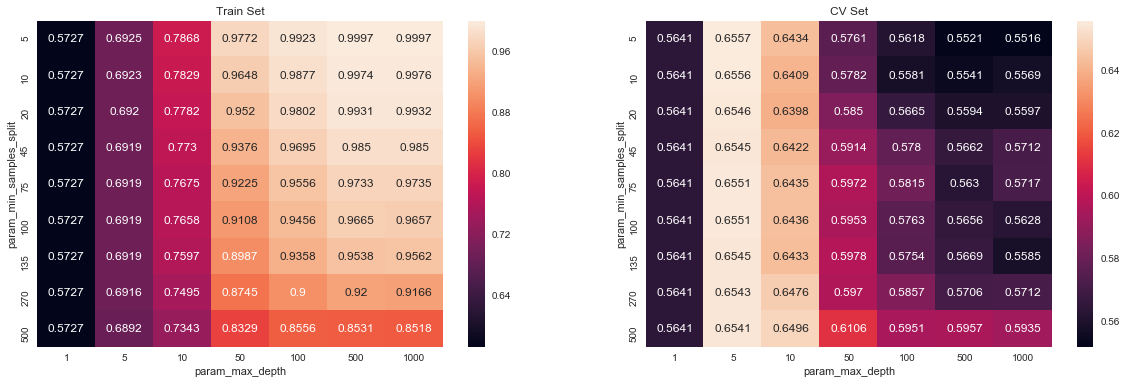

In [72]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

# Best Estimator and Best tune parameters

In [73]:
print(clf1.best_estimator_)
print(clf1.score(X_train_bow_stack,y_train))
print(clf1.score(X_test_bow_stack,y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6869329533615248
0.651497063368639


### Best tune parameters

In [74]:
best_tune_parameters=[{'max_depth':[5], 'min_samples_split':[5] } ]

In [75]:
clf1.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__presort', 'estimator__random_state', 'estimator__splitter', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

# Fitting Model 

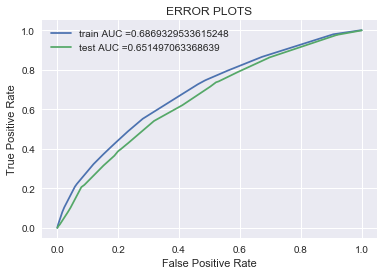

In [76]:
from sklearn.metrics import roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
clf1 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=10,min_samples_split=500)
clf1.fit(X_train_bow_stack,y_train)
clfV1.fit(X_train_bow_stack,y_train)
y_train_pred = clf1.predict_proba(X_train_bow_stack)[:,1]
y_test_pred = clf1.predict_proba(X_test_bow_stack)[:,1]
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, test_threshold = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

# Confusion Matrix

In [77]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

In [78]:
train_confusion = confusion_matrix(y_train, predict(y_train_pred, train_thresholds, train_fpr, train_tpr))
test_confusion = confusion_matrix(y_test, predict(y_test_pred, test_threshold, test_fpr, test_tpr))

the maximum value of tpr*(1-fpr) 0.4 for threshold 0.49
the maximum value of tpr*(1-fpr) 0.37 for threshold 0.49


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.42 for threshold 0.48
[[ 187  187]
 [ 430 1646]]
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.48


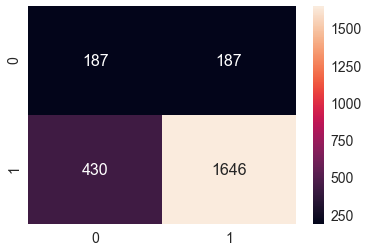

In [80]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, train_thresholds, train_fpr, train_tpr)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, train_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.37 for threshold 0.49
[[1363  951]
 [4809 7877]]
the maximum value of tpr*(1-fpr) 0.37 for threshold 0.49


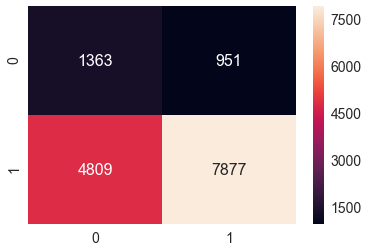

In [79]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, test_threshold, test_fpr, test_tpr)))
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, test_threshold, test_fpr, test_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

# Visualizing Decision Tree

In [80]:
f1 = vectorizer1.get_feature_names()
f2 = vectorizer2.get_feature_names()
f3 = vectorizer3.get_feature_names()
f4 = vectorizer4.get_feature_names()
f5 = vectorizer5.get_feature_names()
fb = vectorizer_bow_essay.get_feature_names()
ft = vectorizer_bow_title.get_feature_names()
fb1 = vectorizer_tfidf_essay.get_feature_names()
ft1 = vectorizer_tfidf_title.get_feature_names()

feature_agg_bow = f1 + f2 + f3 + f4 + f5 + fb + ft
feature_agg_tfidf = f1 + f2 + f3 + f4 + f5 + fb1 + ft1
feature_agg_bow.append('price')
feature_agg_tfidf.append('price')
feature_agg_bow.append('quantity')
feature_agg_tfidf.append('quantity')
feature_agg_bow.append('teacher_previous_projects')
feature_agg_tfidf.append('teacher_previous_projects')
feature_agg_tfidf.append('title_word_count_train')
feature_agg_tfidf.append('essay_word_count_train')
feature_agg_bow.append('title_word_count_train')
feature_agg_bow.append('essay_word_count_train')

In [81]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\SACHEEN\Downloads\graphviz\graphviz'

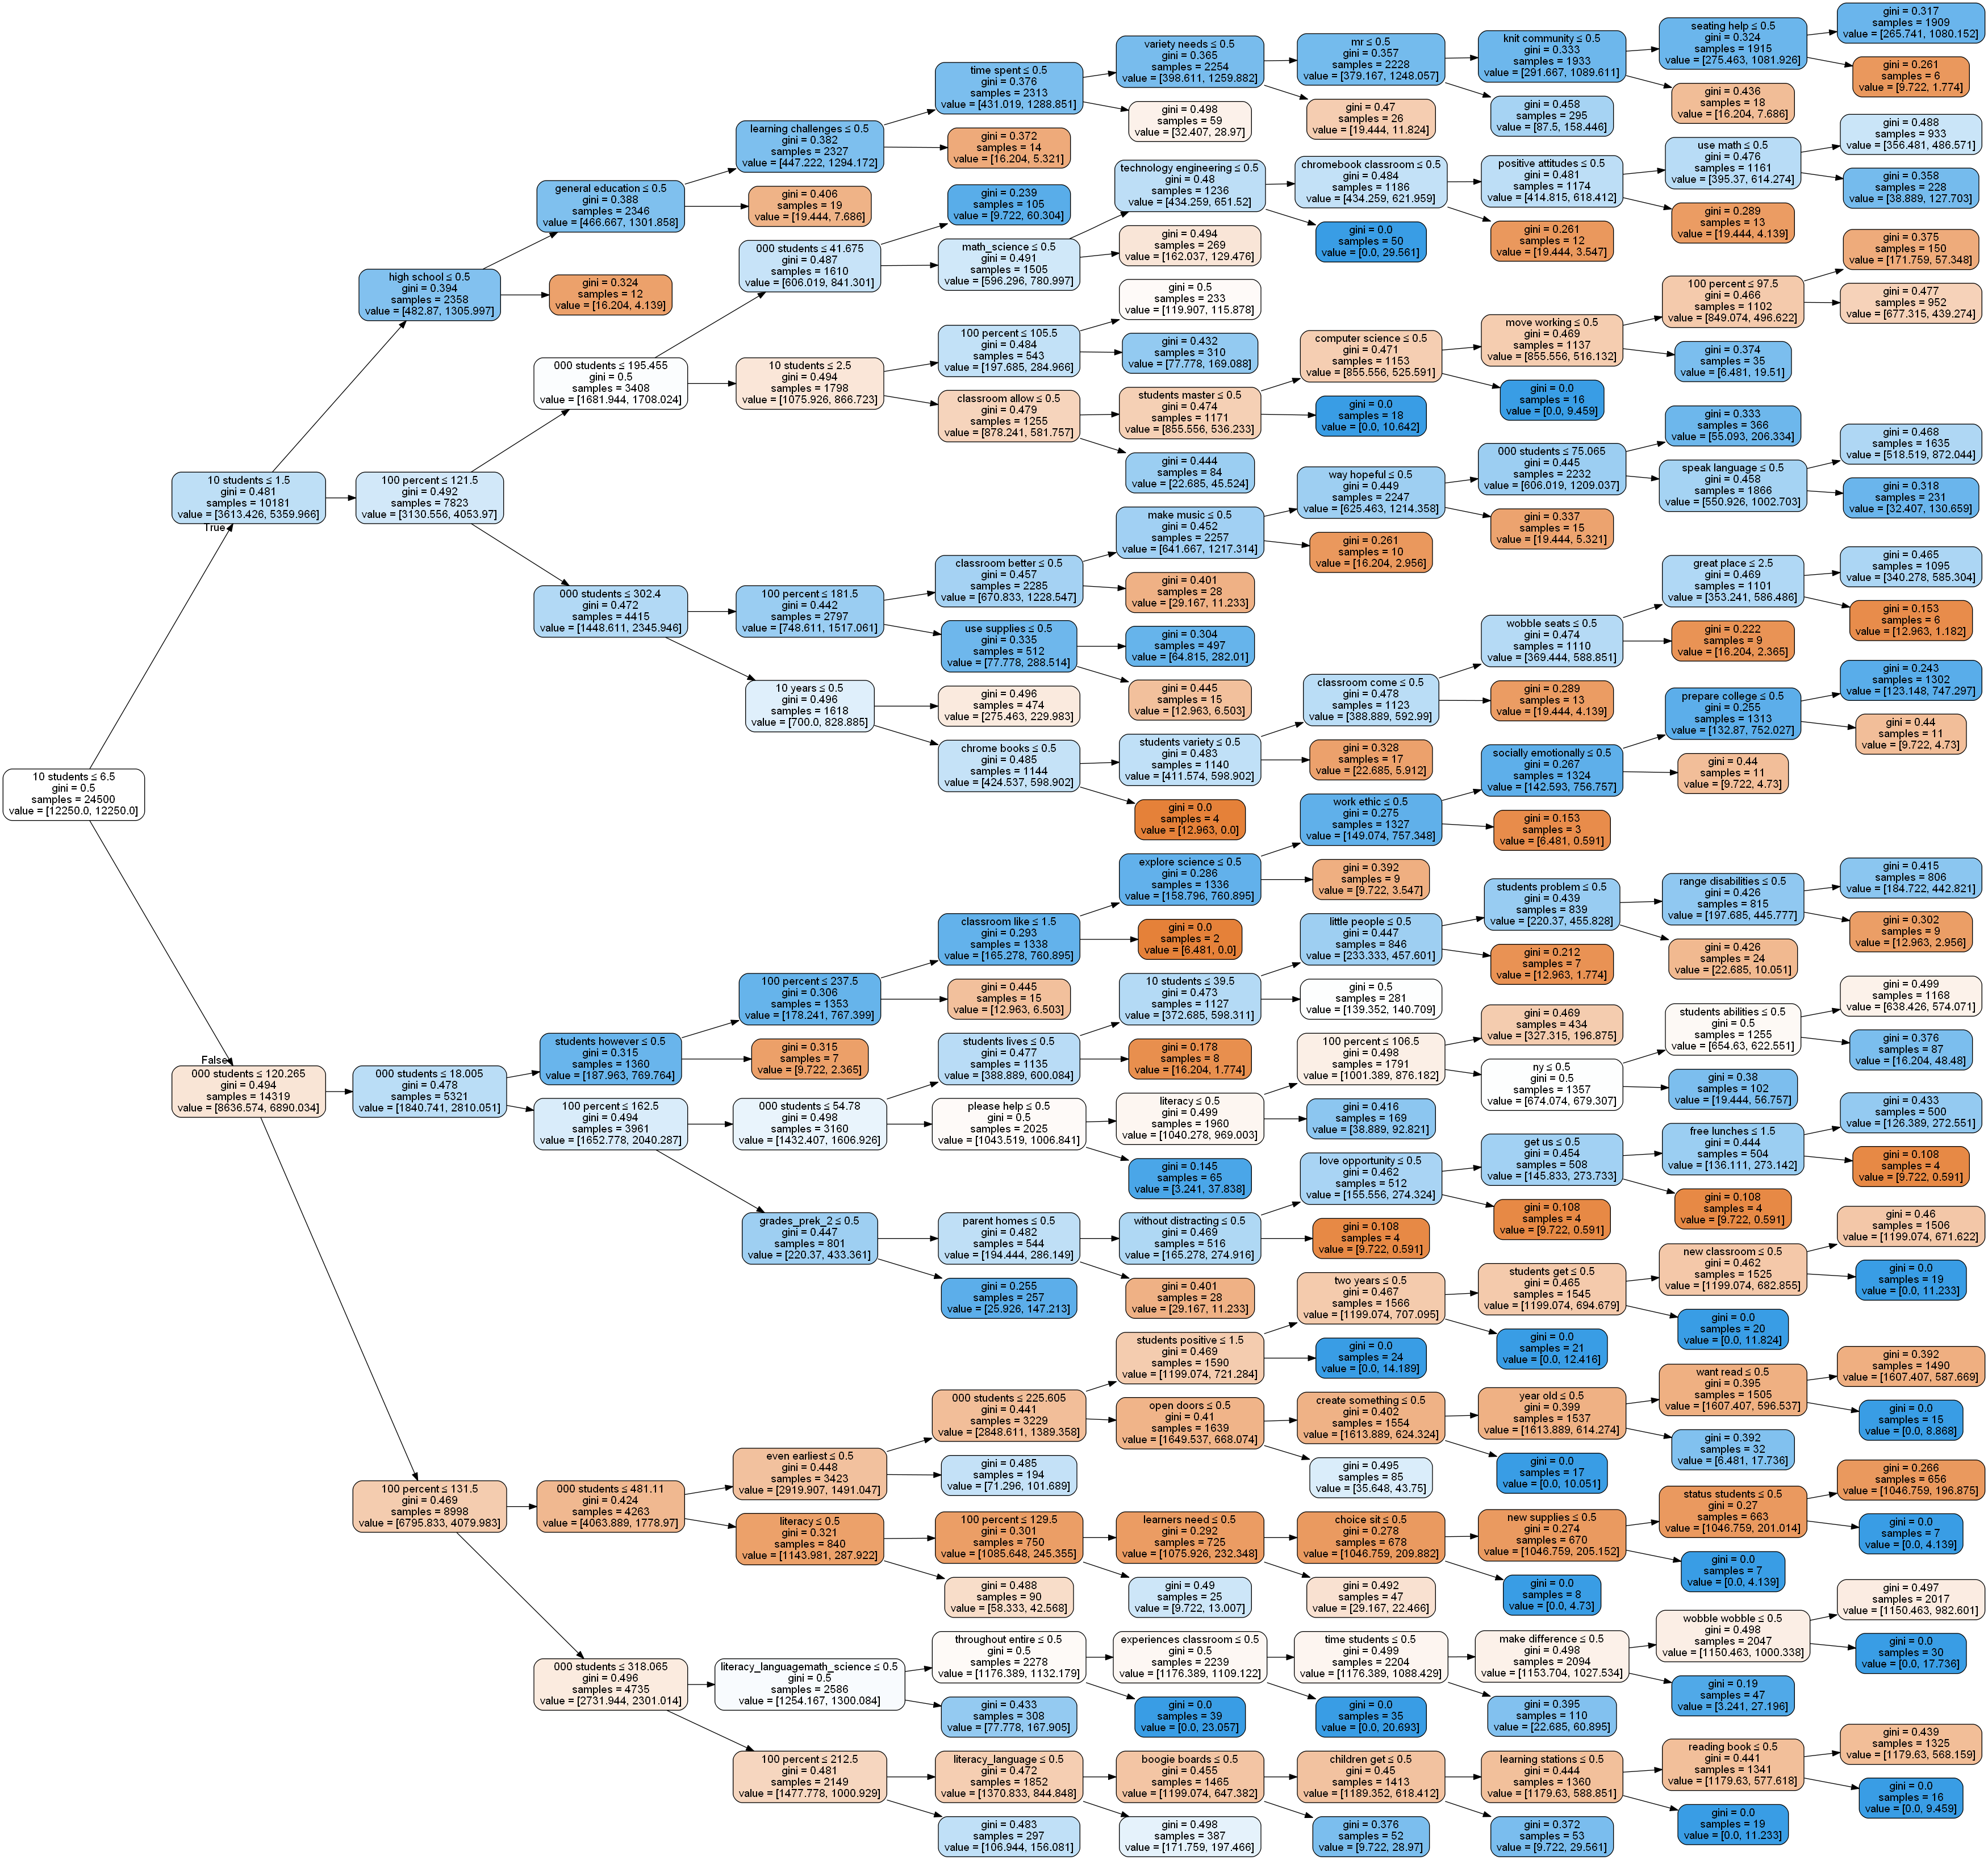

In [82]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clfV1, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_agg_bow,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Decison trees on TFIDF

In [83]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
decTree2 = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],'min_samples_split':[5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf2 = GridSearchCV(decTree2,parameters,cv=3,scoring='roc_auc',return_train_score=True)
set2 = clf2.fit(X_train_tfidf_stack,y_train)

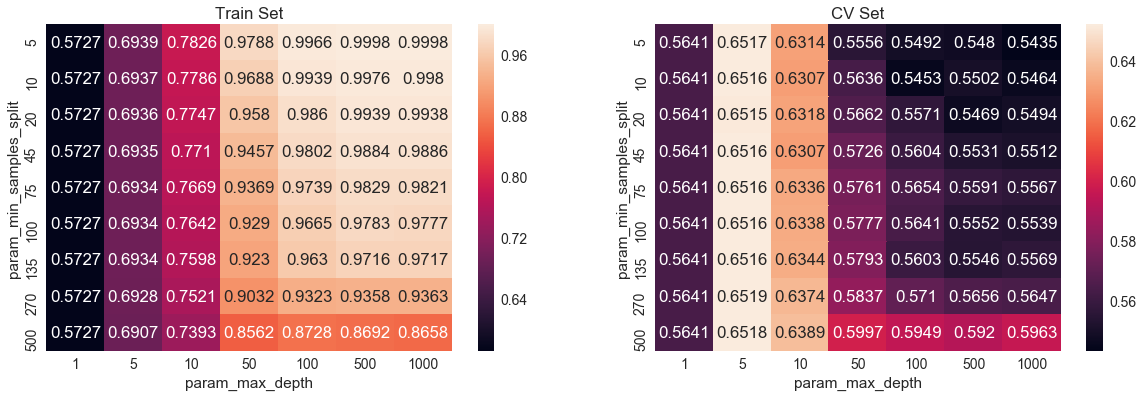

In [84]:
import seaborn as sns
max_scores1 = pd.DataFrame(clf2.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

# Best Estimator and Best tune parameters


In [85]:
print(clf2.best_estimator_)
print(clf2.score(X_train_tfidf_stack,y_train))
print(clf2.score(X_test_tfidf_stack,y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=270,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.686625573277359
0.6470562115241201


# Best tune parameters

In [88]:
best_tune_parameters = [{'max_depth':[5],'min_samples_split':[270]}]

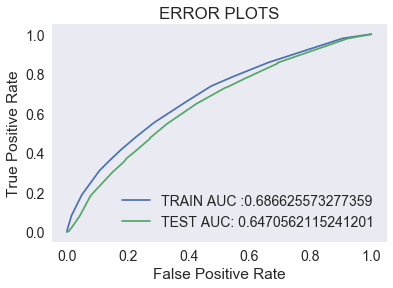

In [90]:
#Fitting Model to Hyper-Parameter Curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf2 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),best_tune_parameters)
clfv2 = DecisionTreeClassifier(class_weight='balanced',max_depth=5,min_samples_split=270)
clf2.fit(X_train_tfidf_stack,y_train)
clfv2.fit(X_train_tfidf_stack,y_train)
y_train_predict = clf2.predict_proba(X_train_tfidf_stack)[:,1]
y_test_predict = clf2.predict_proba(X_test_tfidf_stack)[:,1]

train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_train_predict)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_predict)

plt.plot(train_fpr,train_tpr,label="TRAIN AUC :"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="TEST AUC: "+str(auc(test_fpr,test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.legend()
plt.grid()
plt.show()

# confusion matrix 

the maximum value of tpr*(1-fpr) 0.4 for threshold 0.5
[[ 2314  1466]
 [ 7155 13565]]
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.42


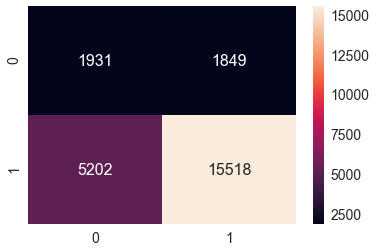

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(confusion_matrix(y_train,predict(y_train_predict,train_thresholds,train_fpr,train_tpr)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, train_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.37 for threshold 0.5
[[1329  985]
 [4459 8227]]
the maximum value of tpr*(1-fpr) 0.37 for threshold 0.5


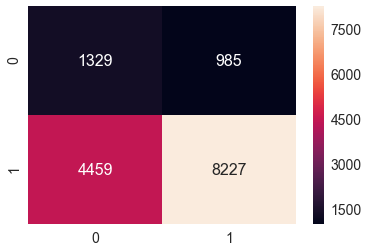

In [92]:
print(confusion_matrix(y_test,predict(y_test_predict,test_thresholds,test_fpr,test_tpr)))
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_predict,test_thresholds,test_fpr,test_tpr))
                                    ,range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(test_confusion_matrix,annot=True,annot_kws={"size":16},fmt='g')

# Visualizing Decision Tree For TFIDF

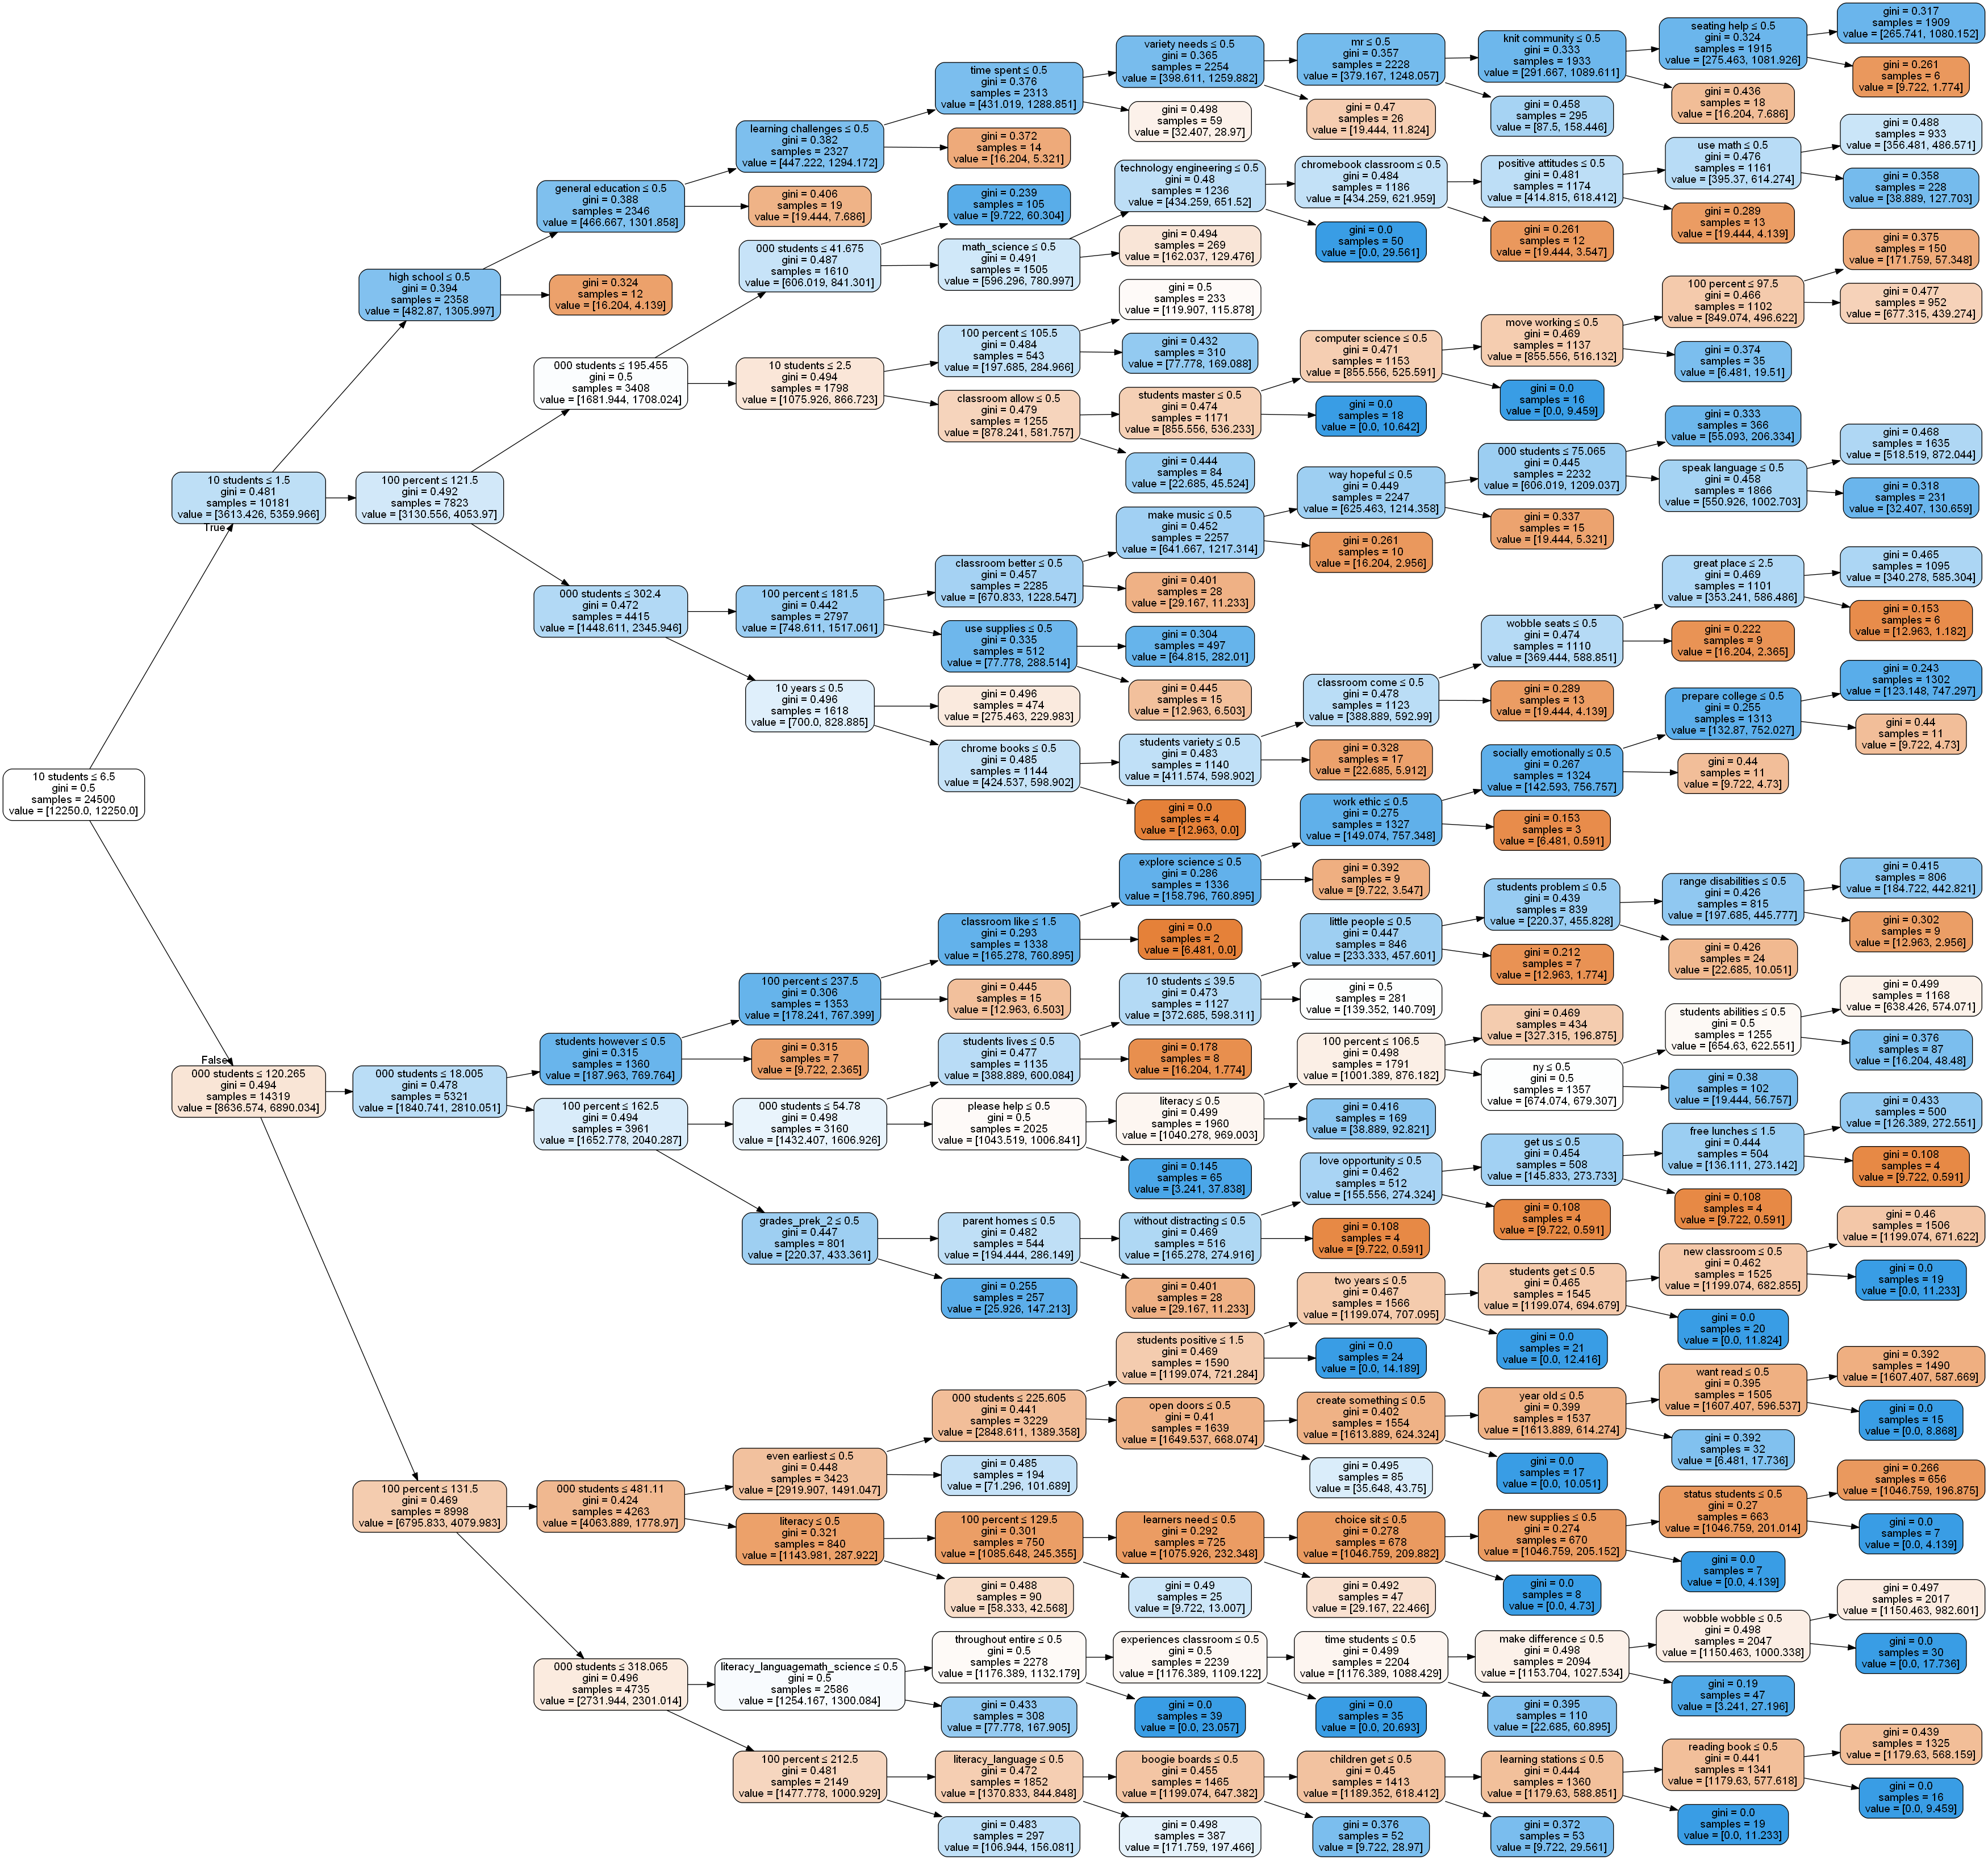

In [93]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clfv2,out_file=dot_data,filled=True,rounded=True,special_characters=True,
                feature_names=feature_agg_tfidf,rotate=True)
Image(graph.create_png())

# Decison trees on AVG W2V

In [94]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
decTree3 = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],'min_samples_split':[5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf3 = GridSearchCV(decTree3,parameters,cv=3,scoring='roc_auc',return_train_score=True)
set3 = clf3.fit(X_train_w2v_stack,y_train)

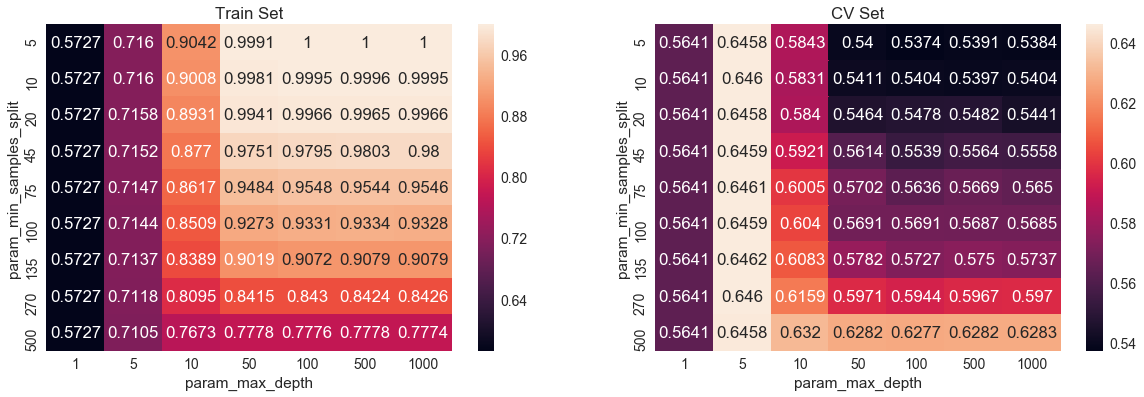

In [95]:
import seaborn as sns
max_scores1 = pd.DataFrame(clf3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [96]:
print(clf3.best_estimator_)
print(clf3.score(X_train_w2v_stack,y_train))
print(clf3.score(X_test_w2v_stack,y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=135,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.700812074829932
0.6516744242388897


# Best tune parameters

In [97]:
best_tune_parameters = [{'max_depth':[5],'min_samples_split':[135]}]

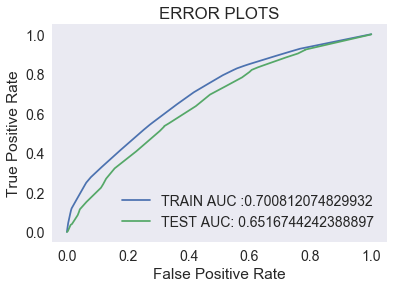

In [98]:
#Fitting Model to Hyper-Parameter Curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf3 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),best_tune_parameters)
clfv3 = DecisionTreeClassifier(class_weight='balanced',max_depth=5,min_samples_split=135)
clf3.fit(X_train_w2v_stack,y_train)
clfv3.fit(X_train_w2v_stack,y_train)
y_train_predict = clf3.predict_proba(X_train_w2v_stack)[:,1]
y_test_predict = clf3.predict_proba(X_test_w2v_stack)[:,1]

train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_train_predict)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_predict)

plt.plot(train_fpr,train_tpr,label="TRAIN AUC :"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="TEST AUC: "+str(auc(test_fpr,test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.legend()
plt.grid()
plt.show()

# confusion matrix 

the maximum value of tpr*(1-fpr) 0.41 for threshold 0.54
[[ 2412  1368]
 [ 7333 13387]]
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.47


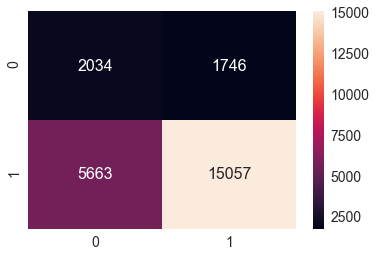

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(confusion_matrix(y_train,predict(y_train_predict,train_thresholds,train_fpr,train_tpr)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, train_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.37 for threshold 0.54
[[1334  980]
 [4614 8072]]
the maximum value of tpr*(1-fpr) 0.37 for threshold 0.54


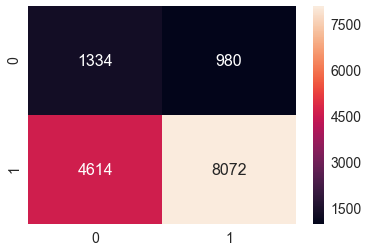

In [100]:
print(confusion_matrix(y_test,predict(y_test_predict,test_thresholds,test_fpr,test_tpr)))
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_predict,test_thresholds,test_fpr,test_tpr))
                                    ,range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(test_confusion_matrix,annot=True,annot_kws={"size":16},fmt='g')

# Applying Decision trees on td_idf W2V

In [101]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
decTree4 = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],'min_samples_split':[5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf4 = GridSearchCV(decTree4,parameters,cv=3,scoring='roc_auc',return_train_score=True)
set4 = clf4.fit(X_train_tfidf_w2v_stack,y_train)

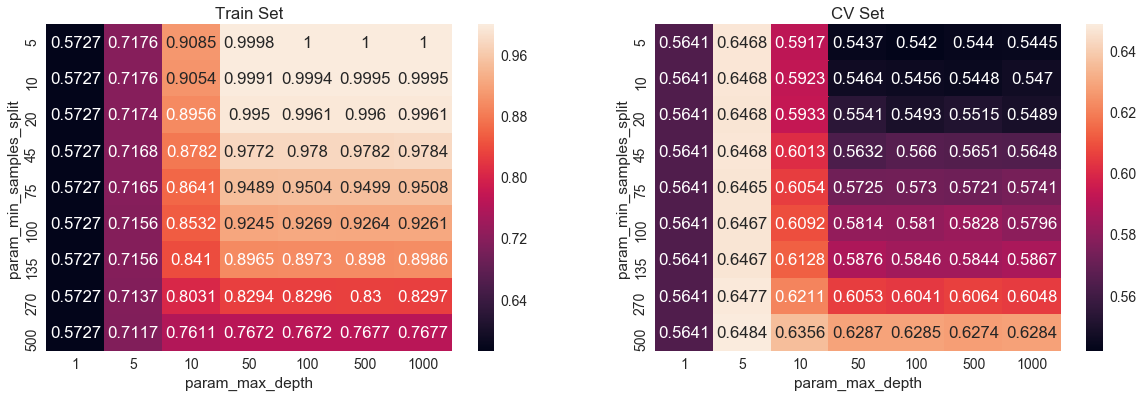

In [102]:
import seaborn as sns
max_scores1 = pd.DataFrame(clf4.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [103]:
print(clf4.best_estimator_)
print(clf4.score(X_train_tfidf_w2v_stack,y_train))
print(clf4.score(X_test_tfidf_w2v_stack,y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.7071995337173909
0.6493618687721008


# Best tune parameters

In [104]:
best_tune_parameters = [{'max_depth':[5],'min_samples_split':[500]}]

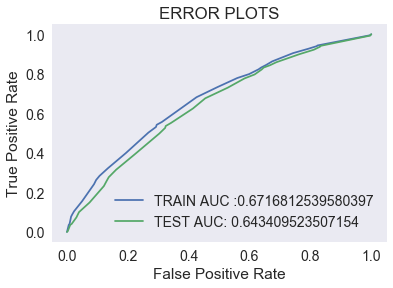

In [105]:
#Fitting Model to Hyper-Parameter Curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf4 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),best_tune_parameters)
clfv4 = DecisionTreeClassifier(class_weight='balanced',max_depth=5,min_samples_split=500)
clf4.fit(X_train_tfidf_w2v_stack,y_train)
clfv4.fit(X_train_tfidf_w2v_stack,y_train)
y_train_predict = clf3.predict_proba(X_train_tfidf_w2v_stack)[:,1]
y_test_predict = clf3.predict_proba(X_test_tfidf_w2v_stack)[:,1]

train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_train_predict)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_predict)

plt.plot(train_fpr,train_tpr,label="TRAIN AUC :"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="TEST AUC: "+str(auc(test_fpr,test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.legend()
plt.grid()
plt.show()

# confusion matrix 

the maximum value of tpr*(1-fpr) 0.39 for threshold 0.54
[[ 2345  1435]
 [ 7654 13066]]
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.48


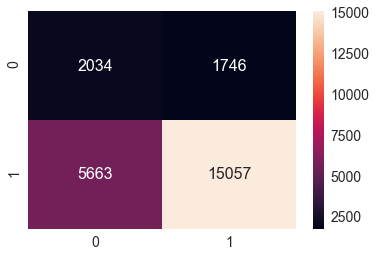

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(confusion_matrix(y_train,predict(y_train_predict,train_thresholds,train_fpr,train_tpr)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, train_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.37 for threshold 0.54
[[1356  958]
 [4766 7920]]
the maximum value of tpr*(1-fpr) 0.37 for threshold 0.54


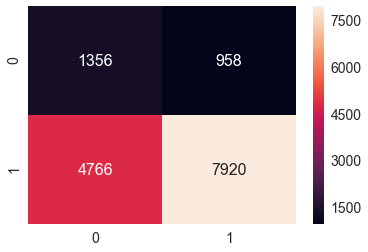

In [107]:
print(confusion_matrix(y_test,predict(y_test_predict,test_thresholds,test_fpr,test_tpr)))
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_predict,test_thresholds,test_fpr,test_tpr))
                                    ,range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(test_confusion_matrix,annot=True,annot_kws={"size":16},fmt='g')

Select 5k best features from features of Set 2 using`feature_importances_`, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3

# 2.5 [Task-2]Getting top 5k features using `feature_importances_`

In [115]:
#https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

from sklearn.feature_selection import SelectFromModel

#sfm to select features based on feature importance from DTclf
#prefit is set as prefit model DTclf is used
DTclf = DecisionTreeClassifier(class_weight='balanced') 
sfm = SelectFromModel(DTclf,threshold=-np.inf)
sfm.fit(X_train_tfidf_stack,y_train)
X_train_tfidf_imp = sfm.transform(X_train_tfidf_stack)
X_cv_tfidf_imp = sfm.transform(X_cv_tfidf_stack)
X_test_tfidf_imp = sfm.transform(X_test_tfidf_stack)

print(X_train_tfidf_imp.shape)
print(X_cv_tfidf_imp.shape)
print(X_test_tfidf_imp.shape)

(24500, 6005)
(10500, 6005)
(15000, 6005)


In [129]:
xtr = X_train_tfidf_stack.tocsr()

In [131]:
#https://stackoverflow.com/questions/47111434/randomforestregressor-and-feature-importances-error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def selectKImportance(model, X, k=5):
    return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:k]]

ImportError: cannot import name 'MultiOutputMixin'

In [ ]:
X_set5_train = selectKImportance(clf2, xtr,5000)
X_set5_test = selectKImportance(clf2, X_test_tfidf_stack, 5000)
print(X_set5_train.shape)
print(X_set5_test.shape)

In [128]:
import sklearn
sklearn.__version__

'0.19.1'

# Using logistic regression on selected 5k features

In [148]:
# Hyperparameter tuning using GridSearchCV

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1')  
parameters = {'C':(0.001,0.01,0.1,1,5,10)}  #creating a parameter distribution from which parameters will be selected on random in RandomizedSearchCV


#Initializing GridSearchCV with LR as model, 3 fold cv and roc_auc as scoring metric
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_train_tfidf_imp, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])


In [149]:
print(results.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [ ]:
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std= results['std_test_score']
K =  np.log10(np.array(results['param_C'],dtype='float64'))

In [ ]:
#Plotting AUC for different hyper parameter values

plt.figure(figsize=(8,5))

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot for text and title with tfidf")
plt.grid()
plt.show()

results.head()

# Observations
* parameter, c=0.1 is selected as it has got resonable auc score and less overfitting

# Applying LR for set1: tfidf with selected features

In [ ]:
#APplying LR on tfidf with C value selected from above hyperparameter tuning
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

#regularization used is L1.
lr = LogisticRegression(C=0.1,penalty='l1',class_weight='balanced')
lr.fit(X_train_tfidf_imp, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(X_train_tfidf_imp)[:,1]
y_test_pred = lr.predict_proba(X_test_tfidf_imp)[:,1]

#y_train_pred = batch_predict(LRclf, X_train_encoded_tfidf)    
#y_test_pred = batch_predict(LRclf, X_test_encoded_tfidf)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

In [ ]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Observations
* auc score for LR on selcted features is 0.702.
* LR on 5k selected features work much better compared to DT on all the features taken together

In [ ]:
#Creating confustion matrix 
import seaborn as sns

print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred,train_thresholds,train_fpr,train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred,test_thresholds,test_fpr,test_tpr)))

conf_matr_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, train_thresholds, train_fpr, train_fpr)), range(2),range(2))
conf_matr_test = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, train_thresholds, train_fpr, train_fpr)), range(2),range(2))

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for train data')
sns.heatmap(conf_matr_train,annot=True,fmt='g')

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for test data')
sns.heatmap(conf_matr_test,annot=True,fmt='g')

# Conclusion

In [ ]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Vectorizer','Model','Hyperparameter','AUC']

vect=['BoW','TFIDF','AVG W2V','TFIDF W2V','selected features']
model=['DT','DT','DT','DT','LR']
hyper=['5,500','5,500','5,500','5,500','0.1']
auc=['0.624','0.626','0.619','0.632','0.702']

for i in range(0,5):
    x.add_row([vect[i],model[i],hyper[i],auc[i]])
print(x)